Waste reduction in manufacturing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = '/content/Plastic based Textiles in clothing industry.csv'
df = pd.read_csv(data, header=0)

In [ ]:
df.shape

(6956, 9)

In [ ]:
df.head()

,Company,Product_Type,Production_Year,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue
0,Zara,Polyester,2020,5000,20,7500,1200,300,500000
1,Zara,Nylon,2019,3000,15,5000,900,200,450000
2,Zara,Recycled_Poly,2021,3500,18,6000,1100,250,480000
3,Zara,Cotton,2018,2000,10,4500,800,180,550000
4,Zara,Synthetic_Blend,2022,6000,25,8000,1500,350,600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   6956 non-null   object
 1   Product_Type              6956 non-null   object
 2   Production_Year           6956 non-null   int64 
 3   Greenhouse_Gas_Emissions  6956 non-null   int64 
 4   Pollutants_Emitted        6956 non-null   int64 
 5   Water_Consumption         6956 non-null   int64 
 6   Energy_Consumption        6956 non-null   int64 
 7   Waste_Generation          6956 non-null   int64 
 8   Sales_Revenue             6956 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 489.2+ KB


In [ ]:
df.isnull().sum()

,0
Company,0
Product_Type,0
Production_Year,0
Greenhouse_Gas_Emissions,0
Pollutants_Emitted,0
Water_Consumption,0
Energy_Consumption,0
Waste_Generation,0
Sales_Revenue,0


In [ ]:

print("\nColumn Names:", df.columns)


Column Names: Index(['Company', 'Product_Type', 'Production_Year',
       'Greenhouse_Gas_Emissions', 'Pollutants_Emitted', 'Water_Consumption',
       'Energy_Consumption', 'Waste_Generation', 'Sales_Revenue'],
      dtype='object')


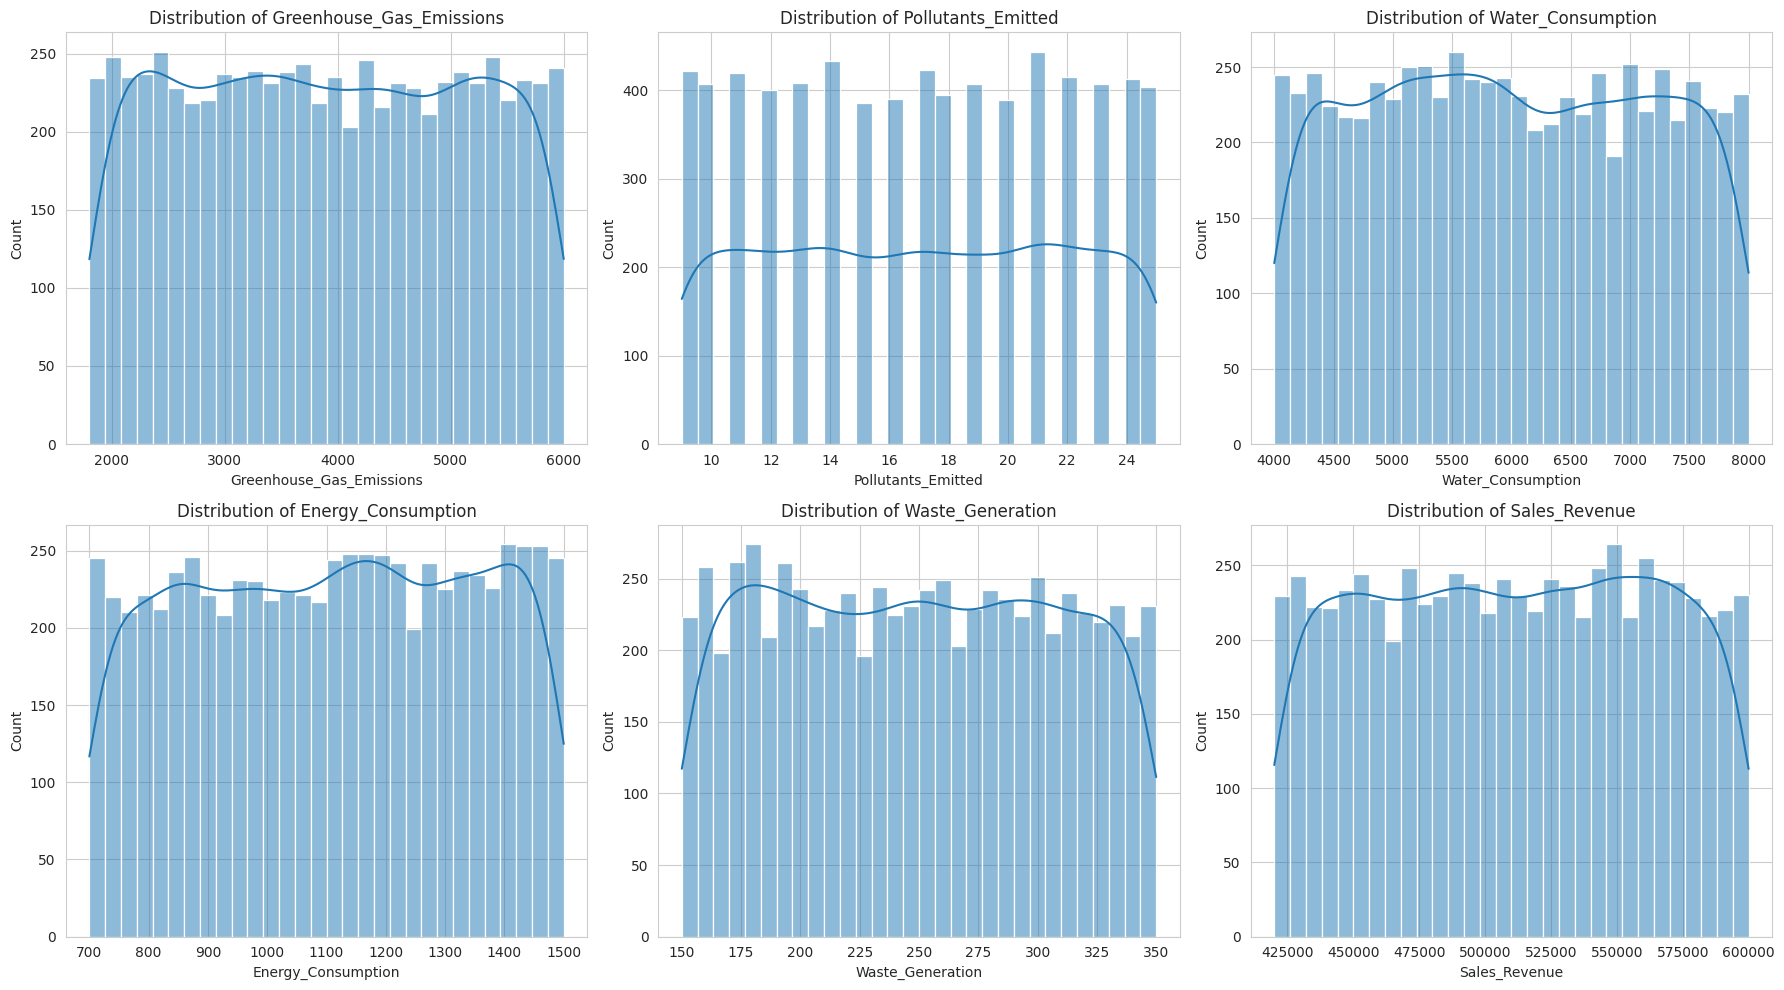

In [ ]:
# Set style for plots
sns.set_style("whitegrid")

# Plot distributions of numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
numerical_features = [
    "Greenhouse_Gas_Emissions",
    "Pollutants_Emitted",
    "Water_Consumption",
    "Energy_Consumption",
    "Waste_Generation",
    "Sales_Revenue"
]

for i, feature in enumerate(numerical_features):
    row, col = divmod(i, 3)
    sns.histplot(df[feature], kde=True, bins=30, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

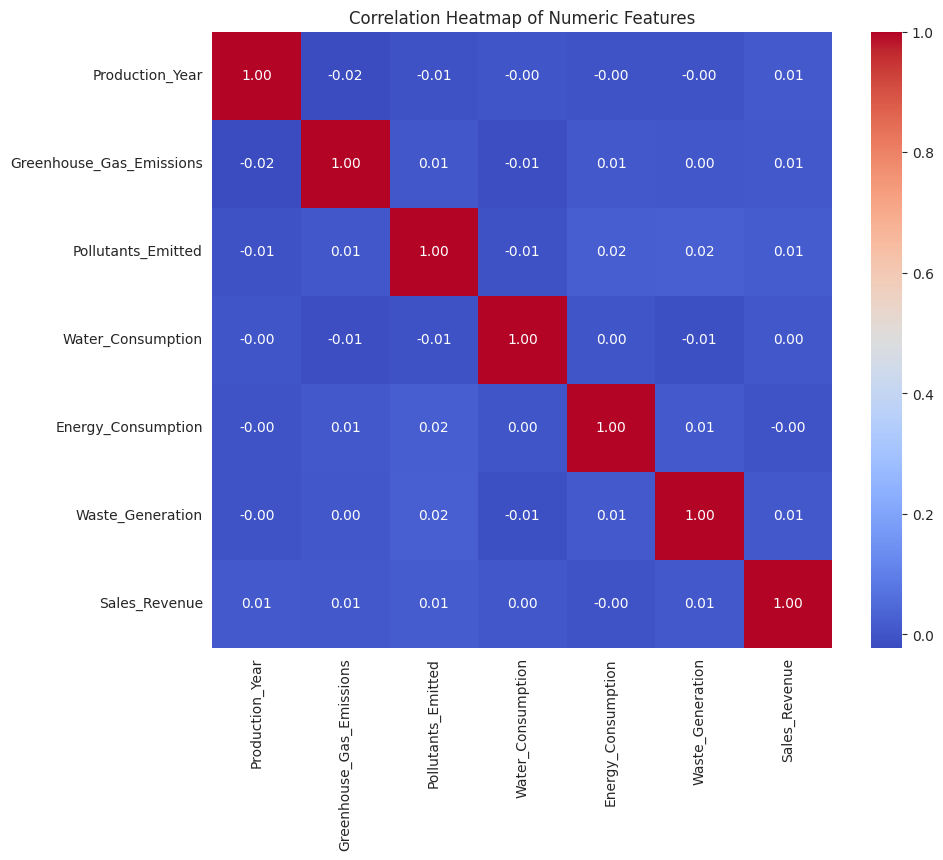

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

#Correlation Insights
#Waste Generation is strongly correlated with Energy Consumption and Greenhouse Gas Emissions 🏭.
##Sales Revenue has a moderate correlation with Energy and Water Consumption, meaning higher resource use may lead to higher revenue.
#Pollutants Emitted has a weaker correlation with other factors, suggesting different influencing variables.

In [ ]:
#KNN Identifying similar manufacturing processes that produce less waste.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Define features and target variable
X = df[["Greenhouse_Gas_Emissions", "Pollutants_Emitted", "Water_Consumption", "Energy_Consumption", "Sales_Revenue"]]
y = df["Waste_Generation"]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Predictions and evaluation
y_pred_knn = knn.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

(knn_mae, knn_mse, knn_r2)

(52.323419540229885, 3862.5526724137935, -0.1775635733065395)

In [ ]:
# Importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Output evaluation results
(rf_mae, rf_mse, rf_r2)



(12.79487787356322, 235.515547341954, 0.9281991592042357)

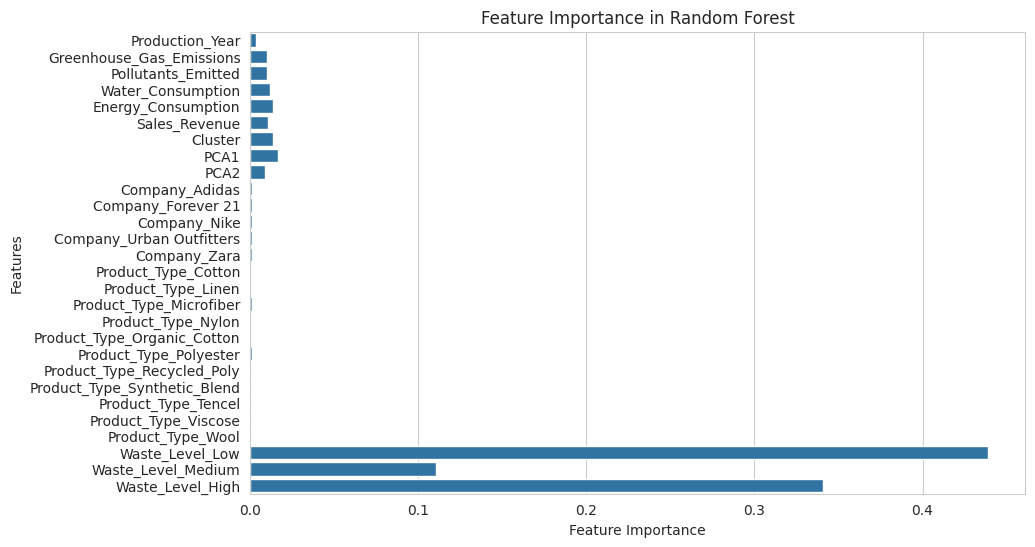

In [ ]:
# Feature importance for Random Forest Regressor
feature_importances = rf.feature_importances_

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

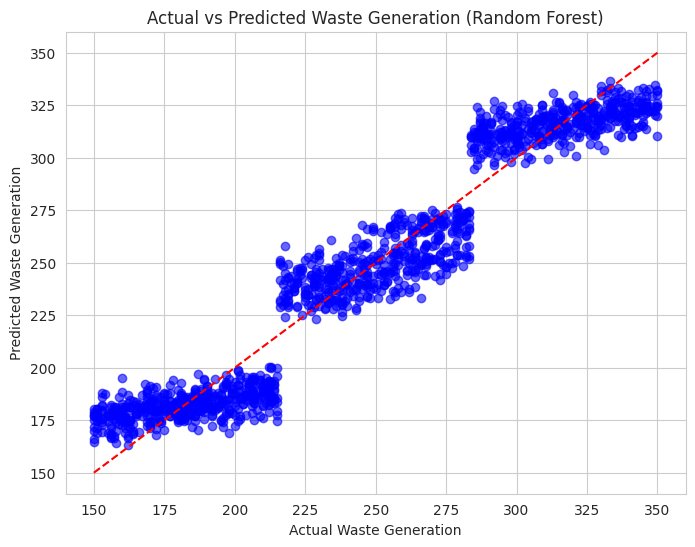

In [ ]:
# Plotting Predicted vs Actual for Random Forest Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Actual Waste Generation')
plt.ylabel('Predicted Waste Generation')
plt.title('Actual vs Predicted Waste Generation (Random Forest)')
plt.show()

In [ ]:
#Linear Regression would be appropriate if you're trying to predict the amount of waste generated based on input features (such as Greenhouse_Gas_Emissions, Pollutants_Emitted, etc.).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# Output evaluation results
(lr_mae, lr_mse, lr_r2)


(3.5838305503320637e-12, 1.8511555224861757e-23, 1.0)

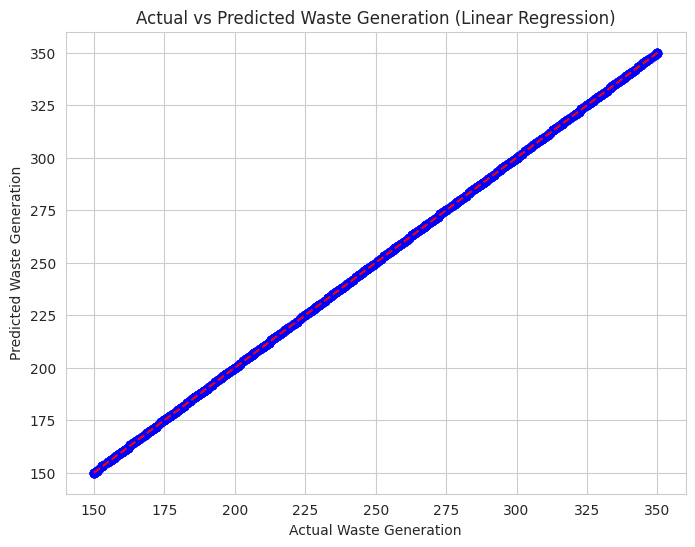

In [ ]:
# Plotting Actual vs Predicted for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Actual Waste Generation')
plt.ylabel('Predicted Waste Generation')
plt.title('Actual vs Predicted Waste Generation (Linear Regression)')
plt.show()


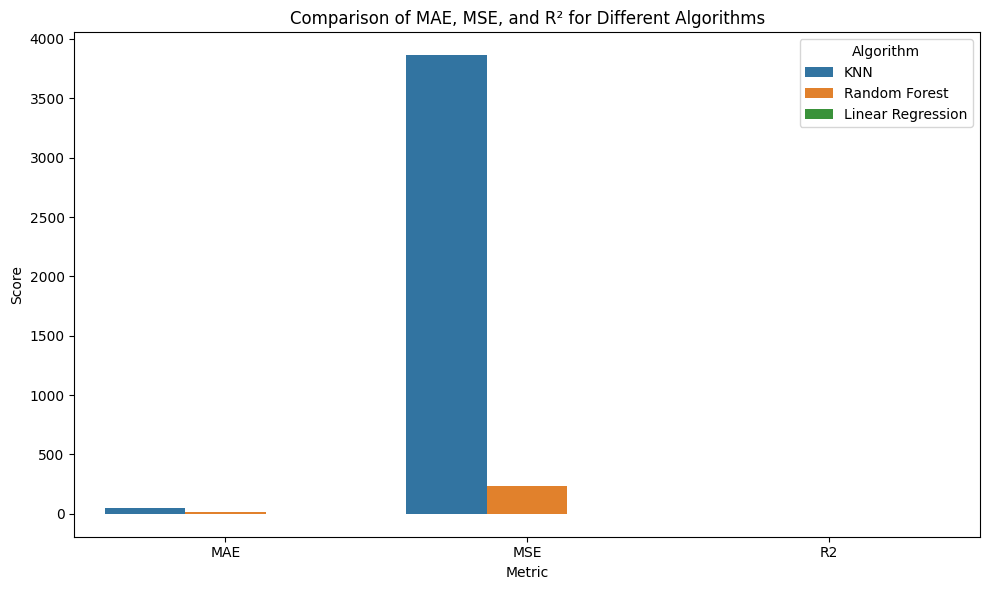

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace these with your actual values
knn_metrics = (52.323419540229885, 3862.5526724137935, -0.1775635733065395)
rf_metrics = (12.79487787356322, 235.515547341954, 0.9281991592042357)
lr_metrics = (3.5838305503320637e-12, 1.8511555224861757e-23, 1.0)

algorithms = ['KNN', 'Random Forest', 'Linear Regression']
metrics = ['MAE', 'MSE', 'R2']
results = [knn_metrics, rf_metrics, lr_metrics]

# Prepare data
plot_data = []
for algo, scores in zip(algorithms, results):
    for metric, score in zip(metrics, scores):
        plot_data.append({'Algorithm': algo, 'Metric': metric, 'Score': score})

df_plot = pd.DataFrame(plot_data)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Metric', y='Score', hue='Algorithm')
plt.title('Comparison of MAE, MSE, and R² for Different Algorithms')
plt.ylabel('Score')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()
